In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.externals import joblib
from sklearn.datasets import fetch_openml

import warnings
warnings.filterwarnings('ignore')

sns.set(style="ticks", color_codes=True)

/home/moataz/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
iris = fetch_openml('iris', version=1)
iris.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names

['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

In [5]:
df = pd.DataFrame(data=iris.data,columns = iris.feature_names)
df['species'] = iris.target
df

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
labels = df['species'].unique()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 1 - No missing values
#### 2-  balanced data (accuracy metric)
#### 3-  all indepndent are numerical vs depndent categorical 

In [8]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#### no outliers , let's check pdf of each var

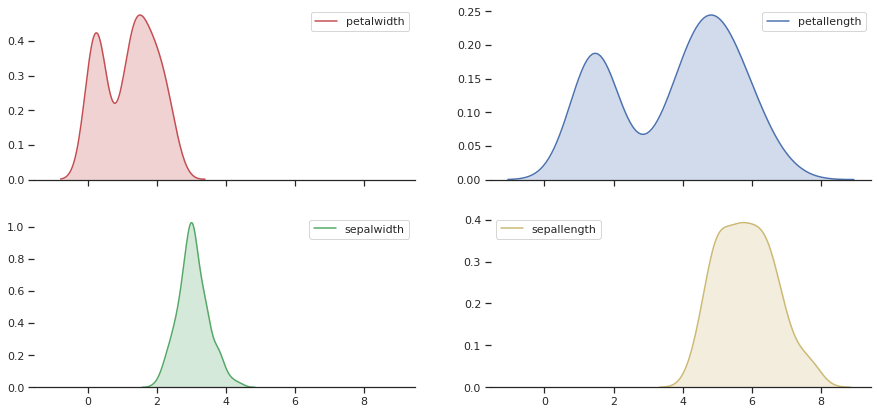

In [10]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)

sns.kdeplot(df["petalwidth"],shade=True,color='r',ax=axes[0,0])
sns.kdeplot(df["petallength"],shade=True,color='b',ax=axes[0,1])
sns.kdeplot(df["sepalwidth"],shade=True,color='g',ax=axes[1,0])
sns.kdeplot(df["sepallength"],shade=True,color='y',ax=axes[1,1])

#### no tails no skew so no outliers

### let's see best features and intuation about each feature

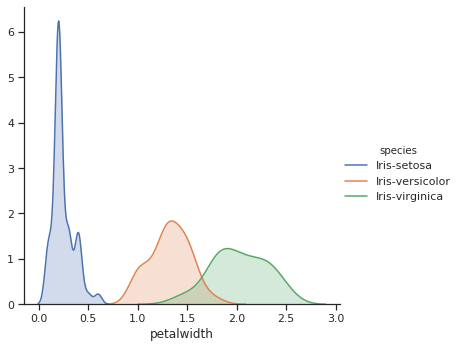

In [11]:
sns.FacetGrid(df, hue="species", size=5) \
   .map(sns.kdeplot, "petalwidth" ,shade=True) \
   .add_legend();

#### Observations:
if pw < 0.7 :setosa

else if pw 1.6: versicolor

else: virginica
#### it's best feature among them as setosa well seprated from each other , k = 1


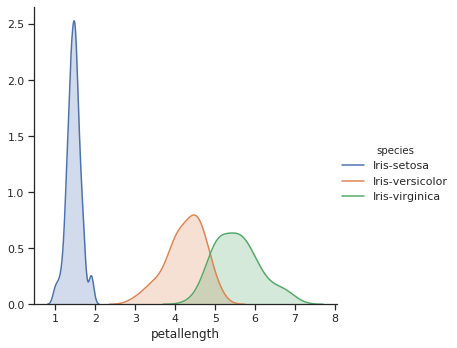

In [12]:
sns.FacetGrid(df, hue="species", size=5) \
   .map(sns.kdeplot, "petallength" ,shade=True) \
   .add_legend();
plt.show();

#### Observations
from petallength i could conclode that:
if pl < 2.5: setosa

elif pl< 4.9: versicolor

else: viginica

#### it's second best feature k = 2 , they also well seperated 

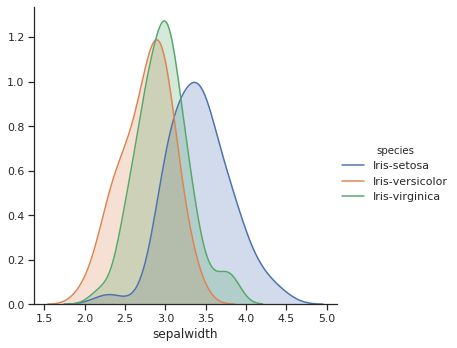

In [13]:
sns.FacetGrid(df, hue="species", size=5) \
   .map(sns.kdeplot, "sepalwidth" ,shade=True) \
   .add_legend();
plt.show();

#### Observations 
#### not a good feature as no seperation between them
#### maybe k = 4 ( worst feature)

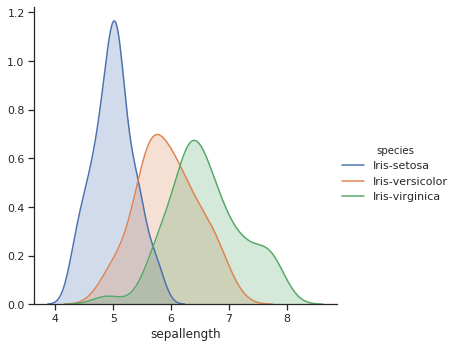

In [14]:
sns.FacetGrid(df, hue="species", size=5) \
   .map(sns.kdeplot, "sepallength" ,shade=True) \
   .add_legend();
plt.show();

#### Observations:
#### not so well also , no pattern in these feature but bettern than sepalwidth , k = 3

#### let's check 2D scatter plot between these features
#### assuming than pl,pw best scatter plot then all pl , then all pw

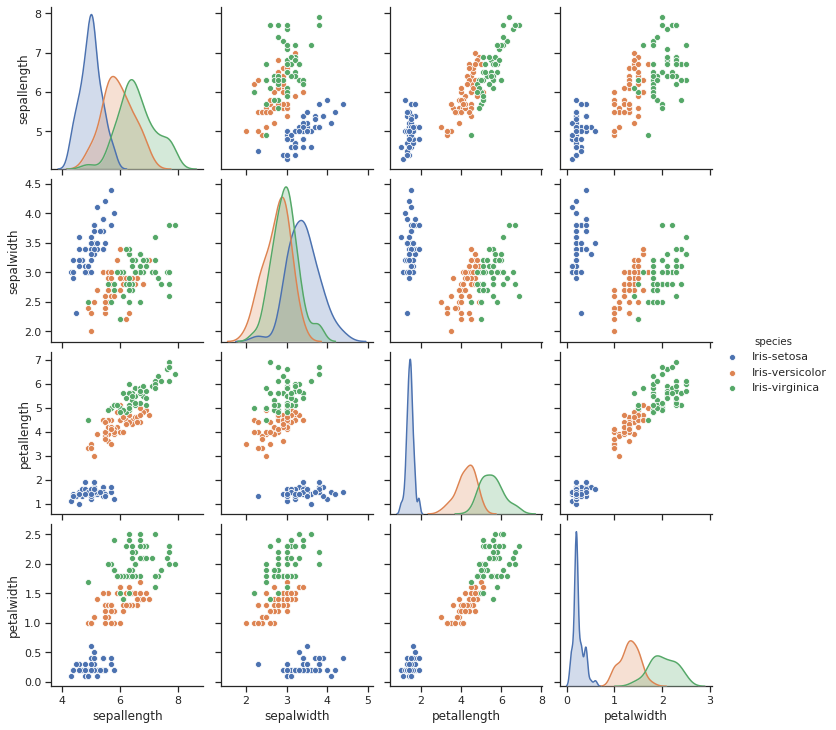

In [15]:
sns.pairplot(df,hue = 'species')

#### our assumption was true


### Intuation using DecisionTree

In [16]:
dst_clf = DecisionTreeClassifier()
dst_clf.fit(iris['data'],iris['target'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
from sklearn.tree import export_graphviz
img_path = open('iris_tree.dot','w')
export_graphviz(
    dst_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names,
    class_names=labels,
    rounded=True,
    filled=True
)

In [18]:
# !dot -Tpng iris_tree.dot -o iris_tree.png

In [19]:
from subprocess import check_call
check_call(['dot','-Tpng','iris_tree.dot','-o','iris_tree.png'])

0

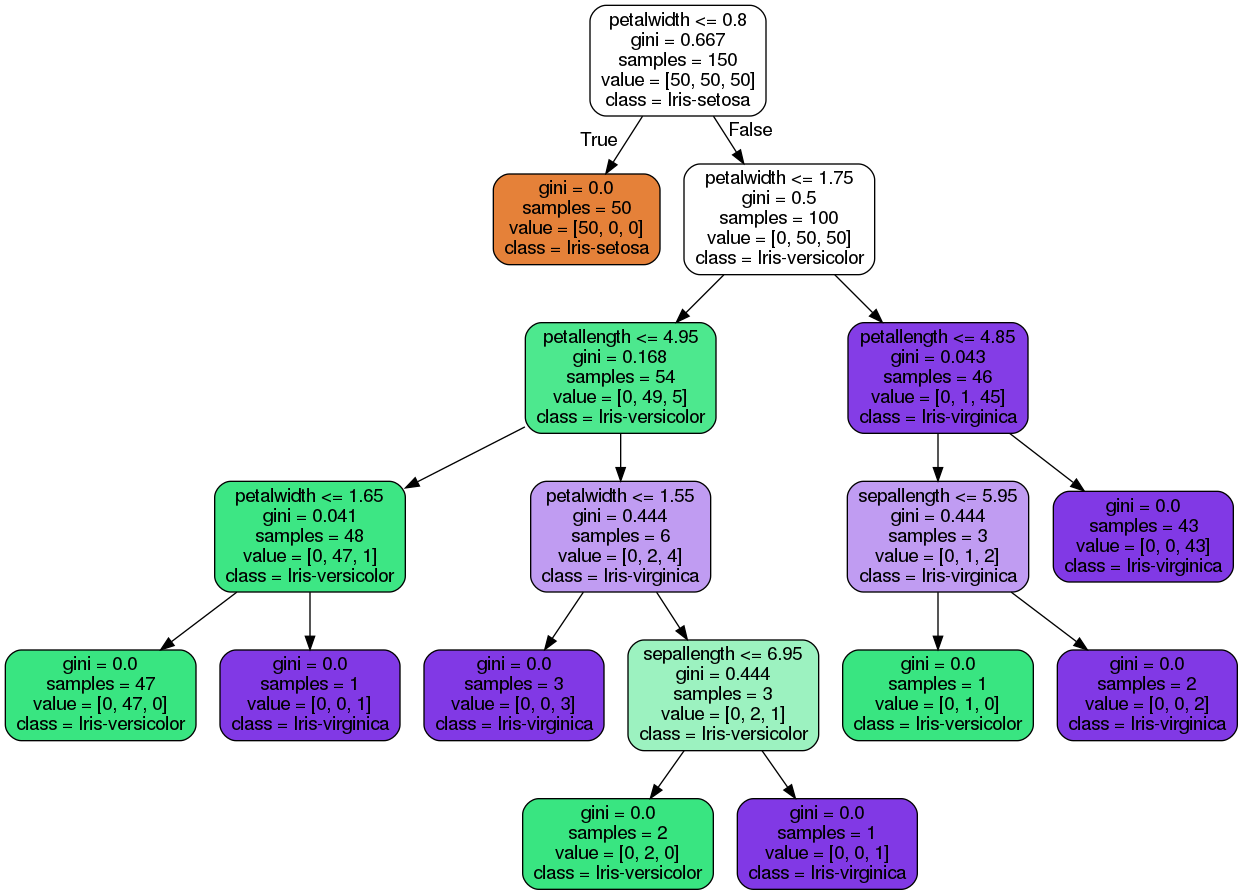

In [20]:
from IPython.display import Image
Image(filename='iris_tree.png') 

#### these are same for what we predicted manually:
#### for ex: if pl<2.45 then setosa , our asuumption was, if pl<2.5

### check weights using RandomForest

In [24]:
rf_clf = RandomForestClassifier()
rf_clf.fit(iris['data'],iris['target'])
feature_importances = rf_clf.feature_importances_
for i,feature in  enumerate(df.columns.values[:4]):
    print(feature,":",feature_importances[i])

sepallength : 0.09527332732252286
sepalwidth : 0.024093568376988485
petallength : 0.40717862401378574
petalwidth : 0.47345448028670295


#### Data cleaning

In [21]:
#sort attributes based on best features
df_data = df[['petallength','petalwidth','sepallength','sepalwidth']]
df_target = df['species']
df_data

,petallength,petalwidth,sepallength,sepalwidth
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


In [22]:
X_train,X_test,y_train,y_test = train_test_split(df_data,df_target,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, K=4):
        self.K = K
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.iloc[:,:self.K].copy() 

In [24]:
preprocessing = Pipeline(steps=[
    ("select_numerator",DataFrameSelector(K=4)),
    ("imputer",SimpleImputer(strategy='median')),
    ("scaler",StandardScaler())
])

### Choose best model

In [25]:
#because i have test data seperated in another file i'll use only X,y with cv instead of X_train,X_test

classifiers = [
    KNeighborsClassifier(4),
    LogisticRegression(n_jobs=-1),
    SGDClassifier(max_iter=1000,penalty='l2' ,tol=1e-3),
    LinearSVC(C=10, loss="hinge"),
    SVC(kernel="poly", degree=3, coef0=1, C=5),
    SVC(kernel="rbf", gamma =5 ,C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    VotingClassifier(estimators=[
        ('lr', LogisticRegression()), 
        ('rf', RandomForestClassifier()), 
        ('svc', SVC(kernel="rbf", gamma =5 ,C=0.025, probability=True))],
        voting='hard'),
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessing', preprocessing),
                      ('classifier', classifier)])
    scores = cross_val_score(pipe, X_train, y_train, cv=10) 
   
    
    print(type(classifier).__name__ ,":",scores.mean())

KNeighborsClassifier : 0.95
LogisticRegression : 0.9583333333333334
SGDClassifier : 0.9166666666666666
LinearSVC : 0.925
SVC : 0.9583333333333333
SVC : 0.3833333333333334
DecisionTreeClassifier : 0.9416666666666667
RandomForestClassifier : 0.9666666666666666
VotingClassifier : 0.9583333333333334


### Finetuning RandomForest

In [31]:
rf = Pipeline(steps=[('preprocessing', preprocessing),
                      ('classifier', RandomForestClassifier())])  
param_grid = [
 {'preprocessing__select_numerator__K':[1,2,3,4],'classifier__n_estimators': [3, 10, 30, 100], 'classifier__max_features': [2, 4, 6, 8]},
 {'preprocessing__select_numerator__K':[1,2,3,4],'classifier__bootstrap': [False], 'classifier__n_estimators': [3, 10], 'classifier__max_features': [2, 3, 4]},
 ]
CV = GridSearchCV(rf, param_grid, n_jobs= 1,cv=10,return_train_score=True)
CV.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        Pipeline(memory=None,
                                                 steps=[('select_numerator',
                                                         DataFrameSelector(K=4)),
                                                        ('imputer',
                                                         SimpleImputer(add_indicator=False,
                                                                       copy=True,
                                                                       fill_value=None,
                                                                       missing_values=nan,
                                                                       strategy='median',
                                                                       verbose=0)),
                                             

In [32]:
print(CV.best_params_)
print(CV.best_estimator_)
cvres = CV.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'classifier__max_features': 2, 'classifier__n_estimators': 10, 'preprocessing__select_numerator__K': 2}
Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('select_numerator', DataFrameSelector(K=2)),
                                 ('imputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='median', verbose=0)),
                                 ('scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('classifier',
                 RandomForestClas...trap=True, ccp_alpha=0.0,
                                        class_weight=None, c

### Evaluation on testing data

In [33]:
y_hat_train = CV.best_estimator_.predict(X_train)
y_hat_test = CV.best_estimator_.predict(X_test)
print("Acc on training data:",accuracy_score(y_hat_train,y_train))
print("Acc on testing data:",accuracy_score(y_hat_test,y_test))

Acc on training data: 0.9916666666666667
Acc on testing data: 0.9333333333333333


### Saving model

In [34]:
joblib.dump(CV.best_estimator_, "iris_best_model.pkl")

['iris_best_model.pkl']

### Loading model

In [ ]:
iris_best_model = joblib.load("iris_best_model.pkl")
iris_best_model